In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

- Create an account to https://openweathermap.org/

- Go to API KEY and copy the api key generated there

- And add it to the cell below

In [3]:
API_KEY = "Add_Your_API_KEY"

In [5]:
CITY = "London"

In [7]:
URL = f"http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric"

In [9]:
response = requests.get(URL)
data = response.json()

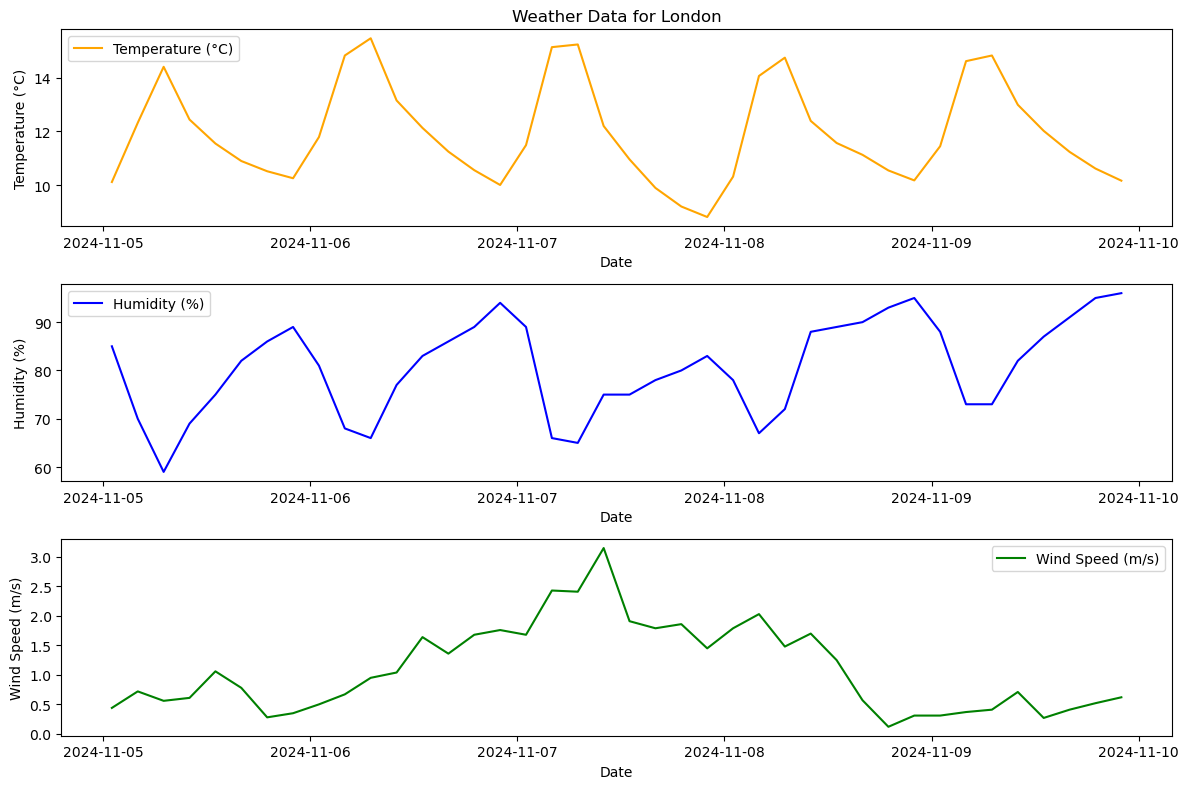

In [13]:
if response.status_code == 200:
    # Step 3: Extract relevant data
    weather_list = data["list"]
    dates = []
    temperatures = []
    humidities = []
    wind_speeds = []

    for entry in weather_list:
        date = datetime.fromtimestamp(entry["dt"])
        dates.append(date)
        
        temperatures.append(entry["main"]["temp"])
        humidities.append(entry["main"]["humidity"])
        wind_speeds.append(entry["wind"]["speed"])
        
    # Step 4: Create a DataFrame
    df = pd.DataFrame({
        "Date": dates,
        "Temperature": temperatures,
        "Humidity": humidities,
        "Wind Speed": wind_speeds
    })
    
    # Step 5: Data visualization
    plt.figure(figsize=(12, 8))
    # Plot Temperature
    plt.subplot(3, 1, 1)
    plt.plot(df["Date"], df["Temperature"], color="orange", label="Temperature (°C)")
    plt.title(f"Weather Data for {CITY}")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.legend()
    
    # Plot Humidity
    plt.subplot(3, 1, 2)
    plt.plot(df["Date"], df["Humidity"], color="blue", label="Humidity (%)")
    plt.xlabel("Date")
    plt.ylabel("Humidity (%)")
    plt.legend()
    
    # Plot Wind Speed
    plt.subplot(3, 1, 3)
    plt.plot(df["Date"], df["Wind Speed"], color="green", label="Wind Speed (m/s)")
    plt.xlabel("Date")
    plt.ylabel("Wind Speed (m/s)")
    plt.legend()

    plt.tight_layout()
    plt.show()

else:
    print("Failed to retrieve data:", data["message"])